# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 19

Group Members:
- Yasra Zhafirah (18222002)
- Benedicta Eryka Santosa (18222031)
- Kerlyn Deslia Andeskar (18222090)
- Dahayu Ramaniya Aurasindu (18222099)

## Import Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as Imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
# Import other libraries if needed

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1_ACviZ7hMl05xJUJMSchSMDTMV81Tp_-')
df

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.000000,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.000000,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [3]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Menyimpan original training set untuk digunakan nanti
original_train_set = df.copy()

# Memisahkan features (x) dan target (y)
x = df.drop('label', axis=1) # drop target = label
y = df['label']

# Split into training dan validation sets (80-20 split with stratification)
x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,  # Untuk reproducibility
    stratify=y  # Maintain class distribution dalam seluruh set
)

train_set = pd.concat([x_train, y_train], axis=1)
val_set = pd.concat([x_val, y_val], axis=1)

print("Original dataset shape:", original_train_set.shape)
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)

print("\nClass distribution:")
print("Original set:\n", original_train_set['label'].value_counts(normalize=True))
print("\nTraining set:\n", train_set['label'].value_counts(normalize=True))
print("\nValidation set:\n", val_set['label'].value_counts(normalize=True))

Original dataset shape: (140404, 56)
Training set shape: (112323, 56)
Validation set shape: (28081, 56)

Class distribution:
Original set:
 label
1    0.924831
0    0.075169
Name: proportion, dtype: float64

Training set:
 label
1    0.924833
0    0.075167
Name: proportion, dtype: float64

Validation set:
 label
1    0.924825
0    0.075175
Name: proportion, dtype: float64


In [4]:
# Memastikan tidak ada data yang hilang setelah splitting
assert len(original_train_set) == len(train_set) + len(val_set)

# Memastikan tidak ada data yang overlap antara train dan validation
assert set(train_set.index).intersection(set(val_set.index)) == set()

# Menyimpan index splitting untuk reproducibility nantinya
train_idx = train_set.index
val_idx = val_set.index

# Mengecek rasio splitting
split_ratio = len(train_set) / len(original_train_set)
print(f"\nActual training set ratio: {split_ratio:.2f}")


Actual training set ratio: 0.80


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [5]:
# Membuat fungsi untuk kolom binary terlebih dahulu sebelum mengidentifikasi jumlah uniques values untuk fitur categorical
# Hal ini dikarenakan data yang binary termasuk dalam categorical

# Fungsi untuk mengidentifikasi kolom binary
def identify_binary_columns(df):
    binary_cols = []

    for column in df.columns:
       # Mengambil nilai unik, mengabaikan missing values (nan)
        unique_values = df[column].dropna().unique()

        # Cek apakah kolom memiliki tepat 2 nilai unik dan nilai-nilainya adalah 0 dan 1
        if len(unique_values) == 2 and set(unique_values) == {0, 1}:
            binary_cols.append(column)

    return binary_cols

# Identifikasi kolom binary
binary_columns = identify_binary_columns(original_train_set)

# Tampilkan hasil
print("Kolom Binary dalam Dataset:")
print("=" * 100)
print(f"Jumlah kolom binary: {len(binary_columns)}")
print("\nDaftar kolom binary:")

# Format tampilan ke samping
for col in binary_columns:
    # Bulatkan nilai sebelum menghitung
    rounded_values = original_train_set[col].round()
    value_counts = rounded_values.value_counts()
    percentages = (value_counts/len(original_train_set)*100).round(2)

    print(f"\n{col}:")
    print(f"Value counts: 0: {value_counts.get(0.0, 0):>6}, 1: {value_counts.get(1.0, 0):>6}", end="  |  ")
    print(f"Percentages: 0: {percentages.get(0.0, 0):>6.2f}%, 1: {percentages.get(1.0, 0):>6.2f}%")

Kolom Binary dalam Dataset:
Jumlah kolom binary: 20

Daftar kolom binary:

IsDomainIP:
Value counts: 0:  98226, 1:     48  |  Percentages: 0:  69.96%, 1:   0.03%

HasObfuscation:
Value counts: 0:  74654, 1:     30  |  Percentages: 0:  53.17%, 1:   0.02%

IsHTTPS:
Value counts: 0:   3483, 1:  87559  |  Percentages: 0:   2.48%, 1:  62.36%

HasTitle:
Value counts: 0:   2390, 1:  93435  |  Percentages: 0:   1.70%, 1:  66.55%

HasFavicon:
Value counts: 0:  38407, 1:  43575  |  Percentages: 0:  27.35%, 1:  31.04%

Robots:
Value counts: 0:  57167, 1:  36505  |  Percentages: 0:  40.72%, 1:  26.00%

IsResponsive:
Value counts: 0:  18287, 1:  79575  |  Percentages: 0:  13.02%, 1:  56.68%

NoOfURLRedirect:
Value counts: 0:  64135, 1:   8885  |  Percentages: 0:  45.68%, 1:   6.33%

NoOfSelfRedirect:
Value counts: 0:  71570, 1:   2119  |  Percentages: 0:  50.97%, 1:   1.51%

HasDescription:
Value counts: 0:  26951, 1:  58814  |  Percentages: 0:  19.20%, 1:  41.89%

HasExternalFormSubmit:
Value coun

In [6]:
# Fungsi untuk mengidentifikasi DataType dan Category dari masing-masing Feature yang ada
def category_identification(df, binary_columns):

    # Buat DataFrame untuk summary
    summary = pd.DataFrame(columns=['Feature', 'Datatype', 'Category'])

    # Isi DataFrame dengan informasi setiap kolom
    for i, column in enumerate(df.columns, 1):
        datatype = str(df[column].dtype)

        # Tentukan category berdasarkan kriteria
        if column in binary_columns:
            category = 'Categorical'
        elif datatype == 'object':
            category = 'Categorical'
        else:
            category = 'Numerical'

        # Tambahkan ke DataFrame summary
        row = pd.DataFrame({
            'Feature': [column],
            'Datatype': [datatype],
            'Category': [category]
        })
        summary = pd.concat([summary, row], ignore_index=True)
    # Menampilkan hasil
    print("\nCategory Identification:")
    print("=" * 100)
    print(summary.to_string(index=False))

    return summary

# Menjalankan fungsi
summary_df = category_identification(df, binary_columns)

# Hitung jumlah masing-masing kategori
category_counts = summary_df['Category'].value_counts()

# Menampilkan informasi tambahan
print("\nInformation:")
print("=" * 100)
print(f"Total Features: {len(summary_df)}")
print(f"Numerical Features: {category_counts.get('Numerical', 0)} ({(category_counts.get('Numerical', 0)/len(summary_df)*100):.2f}%)")
print(f"Categorical Features: {category_counts.get('Categorical', 0)} ({(category_counts.get('Categorical', 0)/len(summary_df)*100):.2f}%)")


Category Identification:
                   Feature Datatype    Category
                        id    int64   Numerical
                  FILENAME   object Categorical
                       URL   object Categorical
                 URLLength  float64   Numerical
                    Domain   object Categorical
              DomainLength  float64   Numerical
                IsDomainIP  float64 Categorical
                       TLD   object Categorical
      CharContinuationRate  float64   Numerical
         TLDLegitimateProb  float64   Numerical
               URLCharProb  float64   Numerical
                 TLDLength  float64   Numerical
             NoOfSubDomain  float64   Numerical
            HasObfuscation  float64 Categorical
        NoOfObfuscatedChar  float64   Numerical
          ObfuscationRatio  float64   Numerical
          NoOfLettersInURL  float64   Numerical
          LetterRatioInURL  float64   Numerical
           NoOfDegitsInURL  float64   Numerical
           Deg

In [7]:
# Cek missing values
print("Missing values in dataset:")
print(original_train_set.isnull().sum())

# Persentase missing values
print("\nPercentage of missing values (%):")
print((original_train_set.isnull().sum() / len(df) * 100).round(2))

Missing values in dataset:
id                                0
FILENAME                      57532
URL                           43487
URLLength                     60639
Domain                        70197
DomainLength                  46319
IsDomainIP                    42130
TLD                           45399
CharContinuationRate          48042
TLDLegitimateProb             52873
URLCharProb                   52071
TLDLength                     47731
NoOfSubDomain                 44060
HasObfuscation                65720
NoOfObfuscatedChar            66798
ObfuscationRatio              64598
NoOfLettersInURL              63338
LetterRatioInURL              65746
NoOfDegitsInURL               58810
DegitRatioInURL               53508
NoOfEqualsInURL               61578
NoOfQMarkInURL                44101
NoOfAmpersandInURL            45387
NoOfOtherSpecialCharsInURL    47629
SpacialCharRatioInURL         62834
IsHTTPS                       49362
LineOfCode                    69153
L

In [8]:
# Handling missing value setelah dilakukan pengecekan missing values
# Untuk features dengan missing values 30-50%,
# menggunakan SimpleImputer untuk features boolean/categorical
# dan menggunakan SimpleImputer dengan strategy='median' untuk features numerical

categorical_features = ['IsDomainIP', 'HasTitle', 'IsResponsive', 'HasHiddenFields', 'NoOfPopup']
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_features = ['DomainLength', 'TLD', 'NoOfSubDomain', 'NoOfQMarkInURL']
numeric_imputer = SimpleImputer(strategy='median')

# Untuk features dengan missing values 33-45%,
# menggunakan KNN Imputer untuk features yang saling berkorelasi

features_for_knn = ['URLLength', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'HasSubmitButton']
knn_imputer = KNNImputer(n_neighbors=5)

# Untuk features dengan missing values >45%,
# features tersebut akan di-drop


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [22]:
# Mendeteksi outlier menggunakan metode IQR (Interquartile Range)
def detect_outliers_iqr(data, columns):
    outlier_indices = {}
    
    for col in columns:
        if data[col].dtype in [np.float64, np.int64]:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identifikasi outlier
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
            outlier_indices[col] = outliers.tolist()
    
    return outlier_indices

# Outlier untuk features yang berkategori numerical
numerical_cols = summary_df[summary_df["Category"] == "Numerical"]["Feature"]
outliers = detect_outliers_iqr(original_train_set, numerical_cols)

# Display outliers 
for col, indices in outliers.items():
    print(f"Feature: {col}, Outliers detected: {len(indices)}")

Feature: id, Outliers detected: 0
Feature: URLLength, Outliers detected: 2513
Feature: DomainLength, Outliers detected: 1774
Feature: CharContinuationRate, Outliers detected: 16778
Feature: TLDLegitimateProb, Outliers detected: 0
Feature: URLCharProb, Outliers detected: 3561
Feature: TLDLength, Outliers detected: 438
Feature: NoOfSubDomain, Outliers detected: 15938
Feature: NoOfObfuscatedChar, Outliers detected: 23
Feature: ObfuscationRatio, Outliers detected: 32
Feature: NoOfLettersInURL, Outliers detected: 2788
Feature: LetterRatioInURL, Outliers detected: 504
Feature: NoOfDegitsInURL, Outliers detected: 4861
Feature: DegitRatioInURL, Outliers detected: 5216
Feature: NoOfEqualsInURL, Outliers detected: 298
Feature: NoOfQMarkInURL, Outliers detected: 418
Feature: NoOfAmpersandInURL, Outliers detected: 64
Feature: NoOfOtherSpecialCharsInURL, Outliers detected: 2961
Feature: SpacialCharRatioInURL, Outliers detected: 6450
Feature: LineOfCode, Outliers detected: 6354
Feature: LargestLineL

In [23]:
# Handling outliers
def handle_outliers(data, outliers_dict, strategy="impute"):
    handled_data = data.copy()
    
    for col, indices in outliers_dict.items():
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if strategy == "impute":
            median_value = data[col].median()
            handled_data.loc[indices, col] = median_value
        elif strategy == "clip":
            handled_data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        elif strategy == "log_transform":
            handled_data[col] = np.log1p(data[col])  # Log transform with +1 to handle zero values
            
    return handled_data

# Example: Applying clipping strategy
train_cleaned = handle_outliers(original_train_set, outliers, strategy="clip")


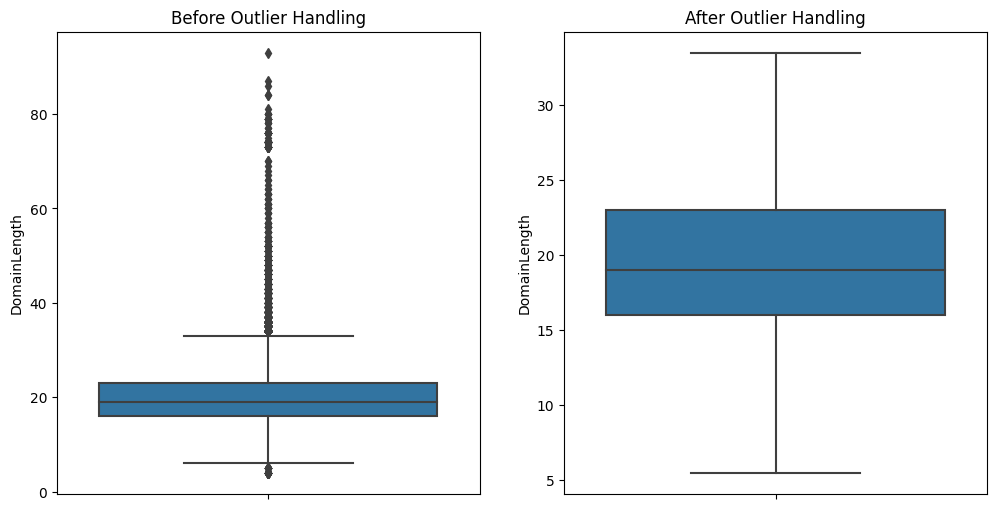

In [24]:
# Visualize the effect of outlier handling
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualization for a specific numerical feature
feature_to_plot = "DomainLength"

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=original_train_set[feature_to_plot], ax=axes[0])
axes[0].set_title("Before Outlier Handling")

sns.boxplot(y=train_cleaned[feature_to_plot], ax=axes[1])
axes[1].set_title("After Outlier Handling")
plt.show()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [25]:
# Identify duplicate rows
duplicates = original_train_set.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(original_train_set[duplicates])

Number of duplicate rows: 0


In [26]:
# Remove duplicate rows
data_no_duplicates = original_train_set.drop_duplicates()

# Confirm the removal
print(f"\nNumber of rows after removing duplicates: {len(data_no_duplicates)}")
print(f"Number of duplicates removed: {len(original_train_set) - len(data_no_duplicates)}")



Number of rows after removing duplicates: 140404
Number of duplicates removed: 0


In [27]:
# Check if the dataset has unique entries
assert data_no_duplicates.duplicated().sum() == 0, "There are still duplicates in the dataset!"

# Display updated dataset shape
print(f"Updated dataset shape: {data_no_duplicates.shape}")

Updated dataset shape: (140404, 56)


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [30]:
# FEATURE SELECTION
# Select only numerical columns
numerical_data = data_no_duplicates.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                                  id  URLLength  DomainLength  IsDomainIP  \
id                          1.000000  -0.006493     -0.000968   -0.001687   
URLLength                  -0.006493   1.000000      0.289682    0.204863   
DomainLength               -0.000968   0.289682      1.000000   -0.025420   
IsDomainIP                 -0.001687   0.204863     -0.025420    1.000000   
CharContinuationRate        0.002367  -0.124541     -0.299010   -0.069108   
TLDLegitimateProb           0.001894   0.025708      0.123278   -0.022281   
URLCharProb                -0.004329  -0.113507     -0.009943   -0.077555   
TLDLength                   0.003860   0.058677      0.124980   -0.005212   
NoOfSubDomain              -0.001072   0.035948      0.205520    0.051158   
HasObfuscation              0.001039   0.278809      0.021147    0.041227   
NoOfObfuscatedChar         -0.003835   0.818319      0.001108    0.067834   
ObfuscationRatio            0.000034   0.200808      0.0

In [52]:
# Check the data types of the columns
numerical_features = ['DomainLength', 'TLD', 'NoOfSubDomain']  # Example
# print(data_no_duplicates[numerical_features].dtypes)

# # Check for non-numeric entries in the selected columns
# for col in numerical_features:
#     print(f"Non-numeric values in {col}:")
#     print(data_no_duplicates[col].apply(lambda x: isinstance(x, (int, float))).value_counts())

# Convert non-numeric values to NaN
data_no_duplicates[numerical_features] = data_no_duplicates[numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in the numerical features
data_no_duplicates = data_no_duplicates.dropna(subset=numerical_features)


In [39]:
# Apply polynomial features to numerical data
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data_no_duplicates[numerical_features])

# Create a DataFrame for the new features
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
print("Polynomial Features added.")

Polynomial Features added.


In [53]:
# creating interaction feature
data_no_duplicates['Interaction_Feature'] = (
    data_no_duplicates['DomainLength'] * data_no_duplicates['NoOfQMarkInURL']
)
print("Interaction Feature added.")

Interaction Feature added.


In [54]:
# Binning the DomainLength feature
bins = [0, 10, 20, 50, 100, np.inf]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
data_no_duplicates['DomainLength_Binned'] = pd.cut(data_no_duplicates['DomainLength'], bins=bins, labels=labels)
print("Binning applied to DomainLength feature.")

Binning applied to DomainLength feature.


In [55]:
# Example: A feature indicating the presence of numbers in a URL
data_no_duplicates['HasNumbersInURL'] = data_no_duplicates['NoOfDegitsInURL'] > 0
print("Domain-specific feature (HasNumbersInURL) created.")

Domain-specific feature (HasNumbersInURL) created.


In [64]:
# Check and create missing features
if 'Interaction_Feature' not in data_no_duplicates.columns:
    print("'Interaction_Feature' not found. Creating it...")
    data_no_duplicates['Interaction_Feature'] = data_no_duplicates['Feature1'] * data_no_duplicates['Feature2']

if 'HasNumbersInURL' not in data_no_duplicates.columns:
    print("'HasNumbersInURL' not found. Creating it...")
    data_no_duplicates['HasNumbersInURL'] = data_no_duplicates['URL'].apply(
        lambda x: 1 if any(char.isdigit() for char in str(x)) else 0
    )

# Ensure 'DomainLength_Binned' exists
if 'DomainLength_Binned' not in data_no_duplicates.columns:
    print("'DomainLength_Binned' not found. Creating it...")
    bins = [0, 10, 20, 50]
    labels = ['Short', 'Medium', 'Long']
    data_no_duplicates['DomainLength_Binned'] = pd.cut(data_no_duplicates['DomainLength'], bins=bins, labels=labels)
    data_no_duplicates['DomainLength_Binned'] = data_no_duplicates['DomainLength_Binned'].map({
        'Short': 1,
        'Medium': 2,
        'Long': 3
    })

# Dynamically select available features
new_features = ['Interaction_Feature', 'DomainLength_Binned', 'HasNumbersInURL']
available_features = [feature for feature in new_features if feature in data_no_duplicates.columns]

if 'label' in data_no_duplicates.columns:
    corr_with_target = data_no_duplicates[available_features + ['label']].corr()['label']
    print("Correlation of new features with the target:")
    print(corr_with_target)
else:
    print("The 'label' column is missing. Cannot compute correlations.")


'Interaction_Feature' not found. Creating it...


KeyError: 'Feature1'

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [40]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [41]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [42]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [43]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [44]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [45]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [46]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [47]:
# Type your code here

## B. Naive Bayes

In [48]:
# Type your code here

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [49]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [50]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`